In [18]:
import numpy as np
import pandas as pd
import matplotlib
import csv
import datetime as dt
import re

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
import random

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.cluster import KMeans
import itertools

from collections import Iterable

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import string
import seaborn as sns
from wordcloud import WordCloud

from nltk.collocations import *
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

import random

import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score,precision_recall_curve,precision_score, accuracy_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import silhouette_score
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

# numerical_reviews = ['Individual Rating', 'Number of Pictures', 'Height', 'Waist', 'Hips', 'Date (ordinal)', 'Time (numerical)']
cmap = sns.diverging_palette(220, 10, as_cmap=True)

from sklearn.model_selection import GridSearchCV


In [8]:
# Setup
item_csv = r"../data/zaful_floral_dresses_latest.csv"
items = pd.read_csv(item_csv)

reviews_csv = r"../data/zaful_reviews_latest.csv"
reviews = pd.read_csv(reviews_csv)

# add sku column to reviews
reviews = pd.merge(reviews, items[['SKU','Rank']], how='inner', on=['SKU'])

In [12]:
reviews.dtypes

SKU                    int64
Individual Rating      int64
Number of Pictures     int64
Comment               object
Date Stamp            object
Color/Size            object
Overall Fit           object
Height                object
Waist                 object
Hips                  object
Bust                  object
Rank                   int64
dtype: object

In [11]:
reviews.head()

,SKU,Individual Rating,Number of Pictures,Comment,Date Stamp,Color/Size,Overall Fit,Height,Waist,Hips,Bust,Rank
0,461000702,5,5,It is thin but I’ve bought for holiday so I’m ...,Aug. 17 2020 at 02:21:14 AM,Color:RED/Size:M,[<span>Overall Fit: True to Size</span>,"<span>Height: 170CM \ 5' 7""</span>","<span>Waist: 73CM \ 28.7""</span>","<span>Hips: 87CM \ 34.3""</span>",<span>Bust Size: 32C</span>],1
1,461000702,5,4,Absolutely in love with this dress true to siz...,Sep. 13 2020 at 13:30:25 PM,Color:WHITE/Size:S,[<span>Overall Fit: True to Size</span>,"<span>Height: 168CM \ 5' 6""</span>","<span>Waist: 62CM \ 24.4""</span>","<span>Hips: 87CM \ 34.3""</span>",<span>Bust Size: 32D</span>],1
2,461000702,5,4,Tamaño correcto y se quedan bien Cómodo y de m...,Sep. 17 2020 at 11:21:28 AM,Color:RED/Size:M,[<span>Overall Fit: True to Size</span>,"<span>Height: 140CM \ 4' 7""</span>","<span>Waist: 66CM \ 26""</span>","<span>Hips: 95CM \ 37.4""</span>",<span>Bust Size: 32C</span>],1
3,461000702,5,4,True to size and fits well Comfortable and of ...,Aug. 19 2020 at 09:20:53 AM,Color:BLACK/Size:S,[<span>Overall Fit: True to Size</span>,"<span>Height: 163CM \ 5' 4""</span>","<span>Waist: 62CM \ 24.4""</span>","<span>Hips: 75CM \ 29.5""</span>",<span>Bust Size: 32AA</span>],1
4,461000702,5,3,True to size and comfortable. I thought when I...,Jun. 16 2020 at 19:19:40 PM,Color:RED/Size:S,[<span>Overall Fit: True to Size</span>,"<span>Height: 170CM \ 5' 7""</span>",<span>Bust Size: 32AA</span>],NaN,NaN,1


# Preparing the Data

In [3]:
# how many products have reviews?
print("Total Reviews: ", len(reviews))
print("Number of Items: ", items['SKU'].nunique())
print("Items without Reviews: ", len(items[items['Number of Reviews'].isnull()]))

Total Reviews:  15726
Number of Items:  519
Items without Reviews:  65


In [5]:
reviews.dtypes

SKU                    int64
Individual Rating      int64
Number of Pictures     int64
Comment               object
Date Stamp            object
Color/Size            object
Overall Fit           object
Height                object
Waist                 object
Hips                  object
Bust                  object
Rank                   int64
dtype: object

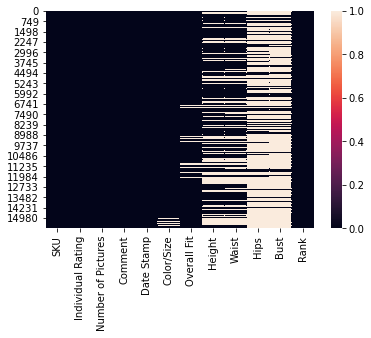

In [6]:
sns.heatmap(reviews.isnull())

In [7]:
## Observations

Drop Hips and Bust.

SyntaxError: invalid syntax (<ipython-input-7-052d1d8ba30f>, line 3)

# Reviews 

### Fix `Height`, `Waist`, `Hips`, `Bust`', and `Overall Fit` values and strip unnecessary text

In [250]:
reviews_cleaned = reviews.copy()

def clean_reviews_whhof(df):
    # Fill empty values with np.NaN
    df = df.replace('[]', ' ')
    # Rename rows - measured in cm (height, waist, hips)
    df = df.rename(columns = {'Unnamed: 7': 'Height', 'Unnamed: 8': 'Waist', 'Unnamed: 9': 'Hips', 'Unnamed: 10': 'Bust'}, inplace = False)

    # replace nan with NaN
    df = df.replace('nan',np.NaN)

    # Reorganize hips, waist, overall fit, height, bust columns
    for record in range(0,len(df)):
        # Bust is in height, rest are missing
        if df.iloc[record,6:11].isnull().sum() == 3 and not df['Height'].str.contains("Height").fillna(False)[record] :
            df.iloc[record, 7] = df.iloc[record, 6] 
            df.iloc[record, 6] = np.NaN 
        # Bust is in waist
        if df.iloc[record,6:11].isnull().sum() == 2 and df['Waist'].str.contains("Height").fillna(False)[record]:
            bust = df.iloc[record, 8] 
            df.iloc[record, 10] = bust
            df.iloc[record, 8] = np.NaN
        if df.iloc[record,6:11].isnull().sum() == 1:
            # Overall Fit missing
            if not df['Overall Fit'].str.contains("Overall Fit").fillna(False)[record]:
                df.iloc[record, 10] = df.iloc[record, 9] 
                df.iloc[record, 9] = df.iloc[record, 8]
                df.iloc[record, 8] = df.iloc[record, 7]
                df.iloc[record, 7] = df.iloc[record, 6]
                df.iloc[record, 6] = np.NaN
            # Height missing
            elif not df['Height'].str.contains("Height").fillna(False)[record]:
                df.iloc[record, 10] = df.iloc[record, 9] 
                df.iloc[record, 9] = df.iloc[record, 8]
                df.iloc[record, 8] = df.iloc[record, 7]
                df.iloc[record, 7] = np.NaN
            # Waist missing
            elif not df['Waist'].str.contains("Waist").fillna(False)[record]:
                df.iloc[record, 10] = df.iloc[record, 9] 
                df.iloc[record, 9] = df.iloc[record, 8]
                df.iloc[record, 8] = np.NaN 
            # Bust missing
            elif not df['Bust'].str.contains("Bust").fillna(False)[record]:
                df.iloc[record, 9] = df.iloc[record, 10] 
                df.iloc[record, 10] = np.NaN 
            # Hips missing
            else:
                bust = df.iloc[record, 9] 
                df.iloc[record, 10] = bust
                df.iloc[record, 9] = np.NaN

    # Extract only the numbers in centimeters
    df['Height'] = df['Height'].str.extract(r'(?<!\d)(\d{3})(?!\d)', expand=False)   
    df['Waist'] = df['Waist'].str.extract(r'(?<!\d)(\d{2})(?!\d)', expand=False)  
    df['Hips'] = df['Hips'].str.extract(r'(?<!\d)(\d{2})(?!\d)', expand=False)  
    df['Bust'] = df['Bust'].str.extract(r'(\d{2}[a-zA-Z]+)', expand=False)
    
    # Convert bust sizes to cm
    bust_conversion = {"34C": 92.5,
    "32C": 87.5,
    "34D": 95.5,
    "32D": 90,
    "34B": 90,
    "32B": 85,
    "36C": 98,
    "32AA": 76,
    "36AA": 86,
    "32A": 82.5,
    "34AA": 81,
    "36D": 101,
    "38AA": 81.5,
    "34A": 87.5,
    "36B": 95.5,
    "38C": 103,
    "36A": 92.5,
    "38B": 100.5,
    "38A": 98,
    "38D": 105.5}
    df['Bust'] = df['Bust'].replace(bust_conversion)

    # Replace Overall Fit 
    # 0 - True to Size
    # 1 - Large
    # -1 - Small
    df['Overall Fit'] = df['Overall Fit'].str.extract(r':(.*)<', expand=False).str.strip().replace({'True to Size', 'Small', 'Large'}, {0, -1, 1})
    df.at[13,'Overall Fit'] = np.nan
    df.at[13,'Height'] = 155
    
    return df

In [248]:
# Separate color and size bought by customer into two columns

def reviews_clean_color_size(df):
    df['Color'] = df['Color/Size'].str.extract(r':(.*)/', expand=False)
    df['Size'] = df['Color/Size'].str.extract(r'Size:(.*)', expand=False)
    return df

### Add and delete columns: Split `Date Stamp` column into `Date`, `Time`, `Time (numerical)`, and `Date (ordinal)`; add `Total Colors` and `Comment Length` column

In [211]:
def reviews_clean_date_time_color_size_comment(df):

    # Separate time and date for linear regression purposes
    df['Date (ordinal)'] = pd.to_datetime(reviews_cleaned['Date Stamp'].str.extract(r'(.*) at', expand=False)).map(dt.datetime.toordinal)
    df['Date'] = pd.to_datetime(reviews_cleaned['Date Stamp'].str.extract(r'(.*) at', expand=False))
    df['Time'] = df['Date Stamp'].str.extract(r'at (.*) [a-zA-Z]+', expand=False)

    result = []
    for i in reviews_cleaned['Time']: 
        (h, m, s) = i.split(':')
        result.append(int(h) * 3600 + int(m) * 60 + int(s))

    df['Time (numerical)']  = result

    # Delete columns that are no longer needed
    df = df.drop(columns=['Color/Size', 'Date Stamp'])

    # Number of total colors (including main)
    # reviews_cleaned['Total Colors'] = reviews_color_encode.apply(lambda x: len(x))

    # Comment Length
    df['Comment'] = df.Comment.astype(str)
    df['Comment Length'] = df['Comment'].apply(lambda x: len(x))

    # change str type to int 
    df[["Height", "Waist",'Hips', 'Bust','Overall Fit']] = df[["Height", "Waist",'Hips', 'Bust','Overall Fit']].apply(pd.to_numeric)
    
    # drop duplicates
    df = df.drop_duplicates()
    df = df.reset_index()
    
    return df

## Apply Changes

In [251]:
reviews_cleaned = clean_reviews_whhof(reviews_cleaned)
reviews_cleaned = reviews_clean_color_size(reviews_cleaned)
reviews_cleaned = reviews_clean_date_time_color_size_comment(reviews_cleaned)
reviews_cleaned = reviews_cleaned.drop('index', axis=1)
reviews_cleaned.head(1)

,SKU,Individual Rating,Number of Pictures,Comment,Overall Fit,Height,Waist,Hips,Bust,Rank,Color,Size,Date (ordinal),Date,Time,Time (numerical),Comment Length
0,461000702,5,5,It is thin but I’ve bought for holiday so I’m ...,-1.0,170.0,73.0,87.0,87.5,1,RED,M,737654,2020-08-17,02:21:14,8474,138


In [13]:
#reviews_cleaned.to_csv(r'reviews_cleaned_1.csv',index=False)

reviews_cleaned = pd.read_csv(r'../data/reviews_cleaned_1.csv')

In [14]:
reviews_cleaned.dtypes

SKU                     int64
Individual Rating       int64
Number of Pictures      int64
Comment                object
Overall Fit           float64
Height                float64
Waist                 float64
Hips                  float64
Bust                  float64
Rank                    int64
Color                  object
Size                   object
Date (ordinal)          int64
Date                   object
Time                   object
Time (numerical)        int64
Comment Length          int64
dtype: object

In [16]:

pd.to_datetime(reviews_cleaned['Date']).max()

Timestamp('2020-09-18 00:00:00')

In [13]:
reviews_cleaned.drop(['Hips','Bust','SKU','Time','Date'],axis=1,inplace=True)

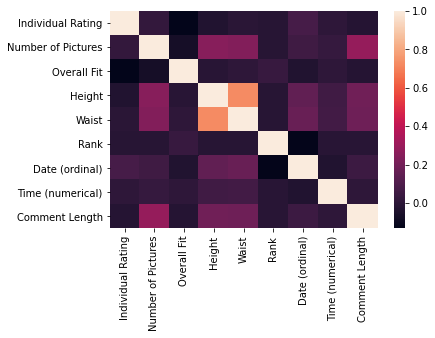

In [14]:
sns.heatmap(reviews_cleaned.corr(method='spearman'))

C:\Users\m2mar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


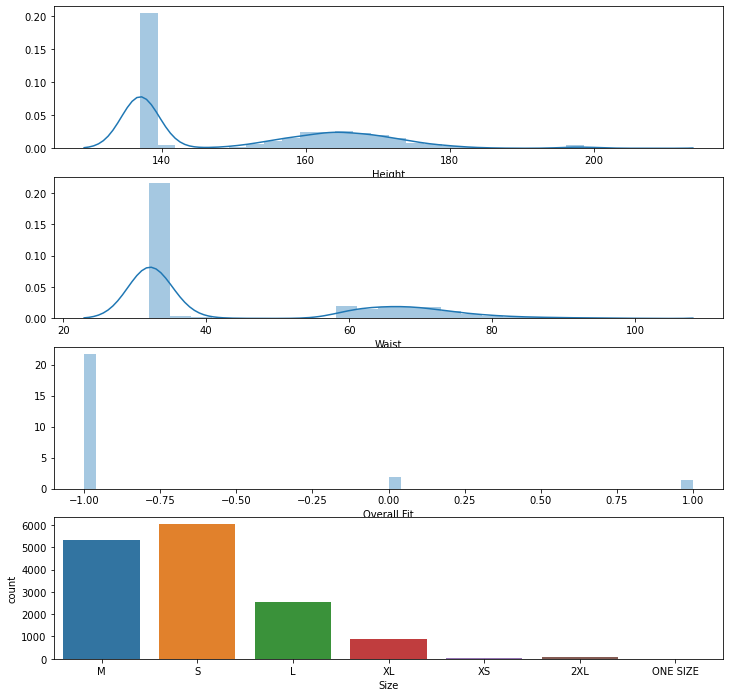

In [15]:
import seaborn as sns
missing_cols = ['Height','Waist','Overall Fit']

fig, ax = plt.subplots(4,1,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in missing_cols:
    ar = sns.distplot(reviews_cleaned[cat],ax=ax[count])
    count+=1 
sns.countplot(reviews_cleaned['Size'],ax=ax[count])

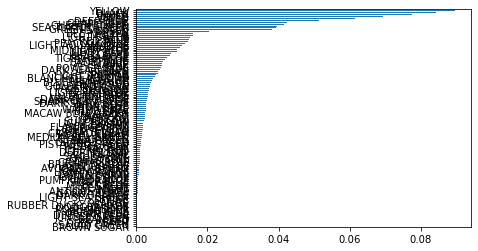

In [257]:
reviews_cleaned['Color'].value_counts(normalize=True).sort_values().plot(kind = 'barh')

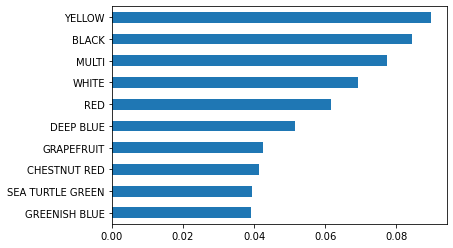

In [86]:
reviews_cleaned['Color'].value_counts(normalize=True)[:10].sort_values().plot(kind = 'barh')

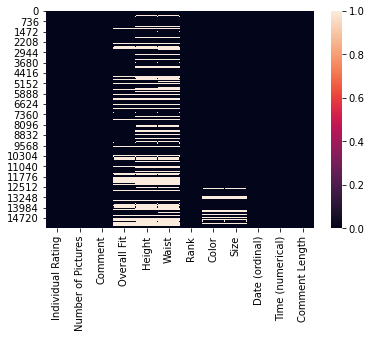

In [218]:
sns.heatmap(reviews_cleaned.isna())

In [16]:
# Check missing values

for i in range(1,11):
    if i != 3:
        print(reviews_cleaned.columns[i])
        print(reviews_cleaned.iloc[:,i].isna().sum(), " missing values")
        print()


Number of Pictures
0  missing values

Comment
1  missing values

Height
4929  missing values

Waist
5072  missing values

Rank
0  missing values

Color
492  missing values

Size
492  missing values

Date (ordinal)
0  missing values

Time (numerical)
0  missing values



## Handle Missing Data

### Randomly Impute `Overall Fit`, `Color`, `Height`, `Waist`, and `Size`

### Create missing columns for columns with missing data

In [17]:
def missing_to_random(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0).values
    return random_sample
reviews_cleaned['missing Overall Fit'] = np.where(reviews_cleaned['Overall Fit'].isna(),1,0)
reviews_cleaned['missing Color'] = np.where(reviews_cleaned['Color'].isna(),1,0)
reviews_cleaned['missing Size'] = np.where(reviews_cleaned['Size'].isna(),1,0)
reviews_cleaned['missing Height'] = np.where(reviews_cleaned['Height'].isna(),1,0)
reviews_cleaned['missing Waist'] = np.where(reviews_cleaned['Waist'].isna(),1,0)
reviews_cleaned.loc[reviews_cleaned['Overall Fit'].isna(),'Overall Fit'] = missing_to_random(reviews_cleaned,'Overall Fit')
reviews_cleaned.loc[reviews_cleaned['Color'].isna(),'Color'] = missing_to_random(reviews_cleaned,'Color')
reviews_cleaned.loc[reviews_cleaned['Size'].isna(),'Size'] = missing_to_random(reviews_cleaned,'Size')

In [30]:
reviews_cleaned.loc[reviews_cleaned['Height'].isna(),'Height'] = missing_to_random(reviews_cleaned,'Height')
reviews_cleaned.loc[reviews_cleaned['Waist'].isna(),'Waist'] = missing_to_random(reviews_cleaned,'Waist')

In [32]:
reviews_cleaned.head()

,Individual Rating,Number of Pictures,Comment,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist
0,5,5,It is thin but I’ve bought for holiday so I’m ...,-1.0,170.0,73.0,1,4,2,737654,8474,138,0,0,0,0,0
1,5,4,Absolutely in love with this dress true to siz...,-1.0,168.0,62.0,1,3,1,737681,48625,283,0,0,0,0,0
2,5,4,Tamaño correcto y se quedan bien Cómodo y de m...,-1.0,140.0,66.0,1,4,2,737685,40888,147,0,0,0,0,0
3,5,4,True to size and fits well Comfortable and of ...,-1.0,163.0,62.0,1,1,1,737656,33653,117,0,0,0,0,0
4,5,3,True to size and comfortable. I thought when I...,-1.0,170.0,32.0,1,4,1,737592,69580,282,0,0,0,0,0


In [19]:
reviews_cleaned['missing Size'].value_counts()

0    14960
1      492
Name: missing Size, dtype: int64

In [20]:
reviews_cleaned['Overall Fit'].value_counts()

-1.0    13453
 0.0     1166
 1.0      833
Name: Overall Fit, dtype: int64

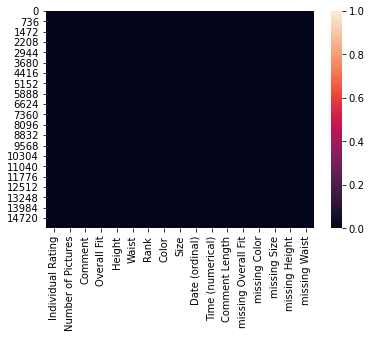

In [33]:
sns.heatmap(reviews_cleaned.isna())

### Normalize Non-Text Features

#### Convert `Color` Type to Integers

In [22]:
color_conversion = reviews_cleaned['Color'].value_counts()[:6].index.values
reviews_cleaned['Color'].replace(color_conversion, np.arange(6),inplace=True)
reviews_cleaned.loc[~reviews_cleaned['Color'].isin([0,1,2,3,4,5,6,np.nan]), "Color"] = 6

In [23]:
reviews_cleaned['Color'].value_counts()

6    8750
0    1381
1    1309
2    1196
3    1075
4     948
5     793
Name: Color, dtype: int64

In [25]:
reviews_cleaned.head()

,Individual Rating,Number of Pictures,Comment,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist
0,5,5,It is thin but I’ve bought for holiday so I’m ...,-1.0,170.0,73.0,1,4,M,737654,8474,138,0,0,0,0,0
1,5,4,Absolutely in love with this dress true to siz...,-1.0,168.0,62.0,1,3,S,737681,48625,283,0,0,0,0,0
2,5,4,Tamaño correcto y se quedan bien Cómodo y de m...,-1.0,140.0,66.0,1,4,M,737685,40888,147,0,0,0,0,0
3,5,4,True to size and fits well Comfortable and of ...,-1.0,163.0,62.0,1,1,S,737656,33653,117,0,0,0,0,0
4,5,3,True to size and comfortable. I thought when I...,-1.0,170.0,32.0,1,4,S,737592,69580,282,0,0,0,0,0


###  Convert Sizes to Numerical

In [26]:
sizes = ['XS', 'S','M','L','XL','2XL','ONE SIZE']
# one size equals medium
# xs is smallest number, 2xl is biggest number
converted_sizes = [0,1,2,3,4,5,2]

In [27]:
reviews_cleaned['Size'].replace(sizes, converted_sizes, inplace=True)

In [28]:
reviews_cleaned[['Size','Color']] = reviews_cleaned[['Size','Color']].apply(pd.to_numeric)

In [29]:
reviews_cleaned.dtypes

Individual Rating        int64
Number of Pictures       int64
Comment                 object
Overall Fit            float64
Height                 float64
Waist                  float64
Rank                     int64
Color                    int64
Size                     int64
Date (ordinal)           int64
Time (numerical)         int64
Comment Length           int64
missing Overall Fit      int32
missing Color            int32
missing Size             int32
missing Height           int32
missing Waist            int32
dtype: object

In [53]:
reviews_cleaned[reviews_cleaned['Comment'].isna()]

,Individual Rating,Number of Pictures,Comment,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist


In [52]:
reviews_cleaned.drop(index=13755, axis=0,inplace=True)

In [5]:
#reviews_cleaned.to_csv(r'../data/reviews_cleaned_before_normalized.csv',index=False)

reviews_cleaned = pd.read_csv(r'../data/reviews_cleaned_before_normalized.csv')

In [6]:
reviews_cleaned['Date (ordinal)']

0        737654
1        737681
2        737685
3        737656
4        737592
          ...  
15446    737307
15447    737290
15448    737307
15449    737648
15450    737648
Name: Date (ordinal), Length: 15451, dtype: int64

In [55]:
# Check missing values

for i in range(1,11):
    if i != 3:
        print(reviews_cleaned.columns[i])
        print(reviews_cleaned.iloc[:,i].isna().sum(), " missing values")
        print()

Number of Pictures
0  missing values

Comment
0  missing values

Height
0  missing values

Waist
0  missing values

Rank
0  missing values

Color
0  missing values

Size
0  missing values

Date (ordinal)
0  missing values

Time (numerical)
0  missing values



## Normalize All Variables (excluding text data)

In [58]:
reviews_normalized = reviews_cleaned.loc[:, reviews_cleaned.columns != 'Comment']
scaler = MinMaxScaler()
scaler.fit_transform(reviews_normalized)
reviews_normalized = pd.DataFrame(scaler.fit_transform(reviews_normalized), columns=reviews_normalized.columns, index=reviews_normalized.index)

In [59]:
reviews_normalized['missing Color'].value_counts()

0.0    14959
1.0      492
Name: missing Color, dtype: int64

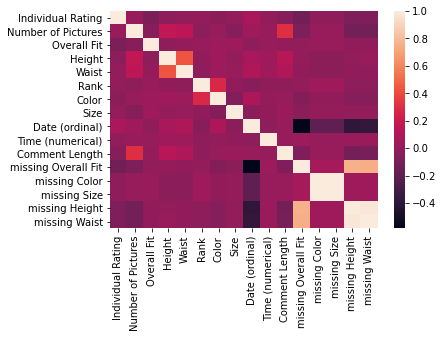

In [60]:
sns.heatmap(reviews_cleaned.corr())

In [61]:
reviews_normalized[reviews_normalized.isna().any(axis=1)]

,Individual Rating,Number of Pictures,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist


In [24]:
#reviews_normalized.to_csv(r'reviews_normalized.csv',index=False)

reviews_normalized = pd.read_csv(r'reviews_normalized.csv')

In [25]:
reviews_normalized.head()

,Individual Rating,Number of Pictures,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist
0,1.0,0.833333,0.0,0.478261,0.611940,0.0,0.666667,0.4,0.982495,0.098029,0.156214,0.0,0.0,0.0,0.0,0.0
1,1.0,0.666667,0.0,0.449275,0.447761,0.0,0.500000,0.2,0.997265,0.562777,0.321551,0.0,0.0,0.0,0.0,0.0
2,1.0,0.666667,0.0,0.043478,0.507463,0.0,0.666667,0.4,0.999453,0.473221,0.166477,0.0,0.0,0.0,0.0,0.0
3,1.0,0.666667,0.0,0.376812,0.447761,0.0,0.166667,0.2,0.983589,0.389476,0.132269,0.0,0.0,0.0,0.0,0.0
4,1.0,0.500000,0.0,0.478261,0.000000,0.0,0.666667,0.2,0.948578,0.805331,0.320410,0.0,0.0,0.0,0.0,0.0


In [26]:
# How many unique reviews
print(reviews_cleaned['Comment'].nunique(), " non-unique comments")

10735  non-unique comments


In [27]:
import string
from nltk.corpus import stopwords
import re

def remove_stops(text, stops):
    #removes all stop words
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
            
    #reassembles the text without stop words
    final = " ".join(final)
    
    #removes all punctuation
    final = final.translate(str.maketrans("", "", string.punctuation))
    
    #removes all numbers
    final = "".join([i for i in final if not i.isdigit()])
    
    #eliminates double white spaces
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    #gets the NLTK's stopword list for English
    stops = stopwords.words("english")
    
    #empty new list to store the cleaned docs
    final = []
    
    #iterate over all docs and cleans them to be a
    #single sentence with no unwanted words
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    
    return (final)

In [79]:
comments = clean_docs(reviews_cleaned[reviews_cleaned['Comment'].notna()]['Comment'])
vectorizer = CountVectorizer(min_df=.01,ngram_range=(1,3),max_df=.8,stop_words='english')
comments_matrix = vectorizer.fit_transform(comments)

In [28]:
comments = clean_docs(reviews_cleaned[reviews_cleaned['Comment'].notna()]['Comment'])
tfidfvectorizer = TfidfVectorizer(min_df=.01,ngram_range=(1,3),max_df=.8,stop_words='english')
tfidfcomments_matrix = tfidfvectorizer.fit_transform(comments)

In [29]:
tfidffeatures = (tfidfvectorizer.get_feature_names())
print("\n\nFeatures : \n", tfidffeatures)
print(len(tfidffeatures))
print("\n\nComments Matrix : \n", tfidfcomments_matrix.toarray())



Features : 
 ['absolutely', 'amazing', 'auf', 'aus', 'aux', 'aux photos', 'beautiful', 'beautiful dress', 'bien', 'big', 'bit', 'chest', 'color', 'comfortable', 'comfortable fantastic', 'comfortable fantastic material', 'comfy', 'como', 'como las', 'como las fotos', 'confortable', 'correcto', 'correcto se', 'correcto se quedan', 'cute', 'cute comfortable', 'cute comfortable fantastic', 'cute dress', 'cute fits', 'cute fits love', 'cute looks', 'cute looks exaclty', 'cute love', 'cómodo', 'cómodo material', 'cómodo material fantástico', 'definitely', 'definitely recommend', 'definitely recommend unique', 'definitivamente', 'der', 'design', 'dress', 'el', 'en', 'es', 'est', 'et', 'et se', 'et se porte', 'exaclty', 'exaclty like', 'exaclty like pictures', 'exactamente', 'exactamente como', 'exactamente como las', 'exactement', 'exactement aux', 'exactement aux photos', 'exactly', 'exactly like', 'exactly like pictures', 'expected', 'fabric', 'fantastic', 'fantastic material', 'fantastic

In [80]:
features = (vectorizer.get_feature_names())
print("\n\nFeatures : \n", features)
print(len(features))
print("\n\nComments Matrix : \n", comments_matrix.toarray())



Features : 
 ['absolutely', 'amazing', 'auf', 'aus', 'aux', 'aux photos', 'beautiful', 'beautiful dress', 'bien', 'big', 'bit', 'chest', 'color', 'comfortable', 'comfortable fantastic', 'comfortable fantastic material', 'comfy', 'como', 'como las', 'como las fotos', 'confortable', 'correcto', 'correcto se', 'correcto se quedan', 'cute', 'cute comfortable', 'cute comfortable fantastic', 'cute dress', 'cute fits', 'cute fits love', 'cute looks', 'cute looks exaclty', 'cute love', 'cómodo', 'cómodo material', 'cómodo material fantástico', 'definitely', 'definitely recommend', 'definitely recommend unique', 'definitivamente', 'der', 'design', 'dress', 'el', 'en', 'es', 'est', 'et', 'et se', 'et se porte', 'exaclty', 'exaclty like', 'exaclty like pictures', 'exactamente', 'exactamente como', 'exactamente como las', 'exactement', 'exactement aux', 'exactement aux photos', 'exactly', 'exactly like', 'exactly like pictures', 'expected', 'fabric', 'fantastic', 'fantastic material', 'fantastic

In [81]:
feature_names = vectorizer.get_feature_names()
feature_names.append(['Individual Rating', 'Number of Pictures', 'Overall Fit', 'Height',
       'Waist', 'Rank', 'Color', 'Size', 'Date (ordinal)', 'Time (numerical)',
       'Comment Length', 'missing Overall Fit', 'missing Color',
       'missing Size', 'missing Height', 'missing Waist'])

dense = comments_matrix.todense()
denselist = dense.tolist()

In [117]:
feature_names = vectorizer.get_feature_names()
feature_names.extend(['Individual Rating', 'Number of Pictures', 'Overall Fit', 'Height',
       'Waist', 'Rank', 'Color', 'Size', 'Date (ordinal)', 'Time (numerical)',
       'Comment Length', 'missing Overall Fit', 'missing Color',
       'missing Size', 'missing Height', 'missing Waist'])
feature_names

['absolutely',
 'amazing',
 'auf',
 'aus',
 'aux',
 'aux photos',
 'beautiful',
 'beautiful dress',
 'bien',
 'big',
 'bit',
 'chest',
 'color',
 'comfortable',
 'comfortable fantastic',
 'comfortable fantastic material',
 'comfy',
 'como',
 'como las',
 'como las fotos',
 'confortable',
 'correcto',
 'correcto se',
 'correcto se quedan',
 'cute',
 'cute comfortable',
 'cute comfortable fantastic',
 'cute dress',
 'cute fits',
 'cute fits love',
 'cute looks',
 'cute looks exaclty',
 'cute love',
 'cómodo',
 'cómodo material',
 'cómodo material fantástico',
 'definitely',
 'definitely recommend',
 'definitely recommend unique',
 'definitivamente',
 'der',
 'design',
 'dress',
 'el',
 'en',
 'es',
 'est',
 'et',
 'et se',
 'et se porte',
 'exaclty',
 'exaclty like',
 'exaclty like pictures',
 'exactamente',
 'exactamente como',
 'exactamente como las',
 'exactement',
 'exactement aux',
 'exactement aux photos',
 'exactly',
 'exactly like',
 'exactly like pictures',
 'expected',
 'fabric

In [109]:
feature_names.append(reviews_normalized.columns)

In [82]:
type(comments_matrix)

scipy.sparse.csr.csr_matrix

In [85]:
from scipy.sparse import csr_matrix
comments_combined = csr_matrix(np.concatenate([denselist, reviews_normalized], axis=1))

In [103]:
comments_combined

<15451x245 sparse matrix of type '<class 'numpy.float64'>'
	with 326262 stored elements in Compressed Sparse Row format>

In [86]:
comments_combined_array = np.array(comments_combined)

In [84]:
comments_matrix

<15451x229 sparse matrix of type '<class 'numpy.int64'>'
	with 185331 stored elements in Compressed Sparse Row format>

In [83]:
print ("Original Text:")
print (comments[0]+"\n")

print ("Cleaned Text:")
print (comments_matrix[0]+"\n")


Original Text:
It thin I’ve bought holiday I’m happy it’s like that Makes boobs look huge which not light I love

Cleaned Text:


NotImplementedError: adding a nonzero scalar to a sparse matrix is not supported

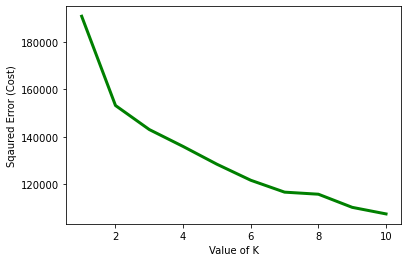

In [122]:
cost =[] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(comments_combined)
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [125]:
## visualizing cluster

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmean_indices = model.fit_predict(comments_combined)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(comments_combined.toarray())

In [142]:
model.labels_

array([4, 5, 4, ..., 4, 4, 4])

In [143]:
reviews_normalized['kmeans7'] = model.labels_

In [144]:
reviews_normalized['kmeans7'].value_counts()

4    5918
1    3482
3    2140
6    1366
0    1218
5    1093
2     234
Name: kmeans7, dtype: int64

red - cluster 0
blue - cluster 1
magenta - cluster 2
yellow - cluster 3
cyan - cluster 4
green - cluster 5
black - cluster 6


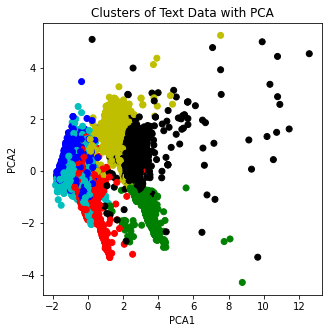

In [139]:

colors = ["r", "b", "m", "y", "c","g","k"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]


fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Text Data with PCA')
print('red - cluster 0')
print('blue - cluster 1')
print('magenta - cluster 2')
print('olive - cluster 3')
print('cyan - cluster 4')
print('green - cluster 5')
print('black - cluster 6')

In [123]:
true_k = 7

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(comments_combined)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = feature_names
i=0

for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
Individual Rating
Date (ordinal)
Color
Time (numerical)
Rank
Size
missing Waist
missing Height
dress
material

Cluster 1
material
fantastic
fantastic material
comfortable
comfortable fantastic
comfortable fantastic material
like
looks
pictures
like pictures

Cluster 2
super
cute
super cute
like
Individual Rating
pictures
like pictures
looks
exaclty like
exaclty

Cluster 3
material
size
comfortable
fits
true size
true
fantastic
fantastic material
comfortable fantastic material
comfortable fantastic

Cluster 4
like
exaclty
exaclty like
looks
pictures
like pictures
exaclty like pictures
Individual Rating
looks exaclty
looks exaclty like

Cluster 5
size
true
fits
true size
like
Individual Rating
looks
pictures
like pictures
size fits

Cluster 6
size
love
true
true size
like
pictures
cute
like pictures
exaclty like pictures
exaclty



## Observations

Cluster 0: Based off the most common column values, it seems that samples in this cluster were grouped because they appeared at similar dates and had a smaller amount of missing values for Height and Waist. These similarities could indicate that the reviews were due to bots that spammed similar reviews at a specific time period. The word 'dress' appeared frequently in this cluster but not any other cluster. Smaller overall fit meaning people found the size to be true to size than large.

Cluster 1: The most prominent words were variations of each other. This cluster may be highly prone to fake. Smaller average number of pictures. More missing Overall Fit. Almost all of them had missing Height and Waist.nd posted at a date different from the average.

Cluster 2:

Cluster 3:

Cluster 4:

Cluster 6 has the most variance in PCA1 so this cluster has less similar features with each other than other clusters a

Cluster 0,1, and 4 (red, blue, and cyan) overalp a lot in regards to PCA1 so they are more similar to each other than other clusters.]

Cluster 2 has the least amount of samples.

In [146]:
reviews_normalized.describe()

,Individual Rating,Number of Pictures,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist,kmeans7
count,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000,15451.000000
mean,0.976911,0.067622,0.091645,0.201649,0.196834,0.427760,0.724624,0.379186,0.872812,0.498009,0.097172,0.215391,0.031843,0.031843,0.318944,0.328199,3.087373
std,0.074695,0.127723,0.253740,0.226074,0.271424,0.289598,0.363907,0.185623,0.126467,0.262715,0.065126,0.411106,0.175587,0.175587,0.466082,0.469573,1.755067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.201681,0.333333,0.200000,0.798687,0.291789,0.050171,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.378151,1.000000,0.400000,0.931072,0.493420,0.079818,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.166667,0.000000,0.405797,0.477612,0.680672,1.000000,0.400000,0.961160,0.706984,0.125428,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


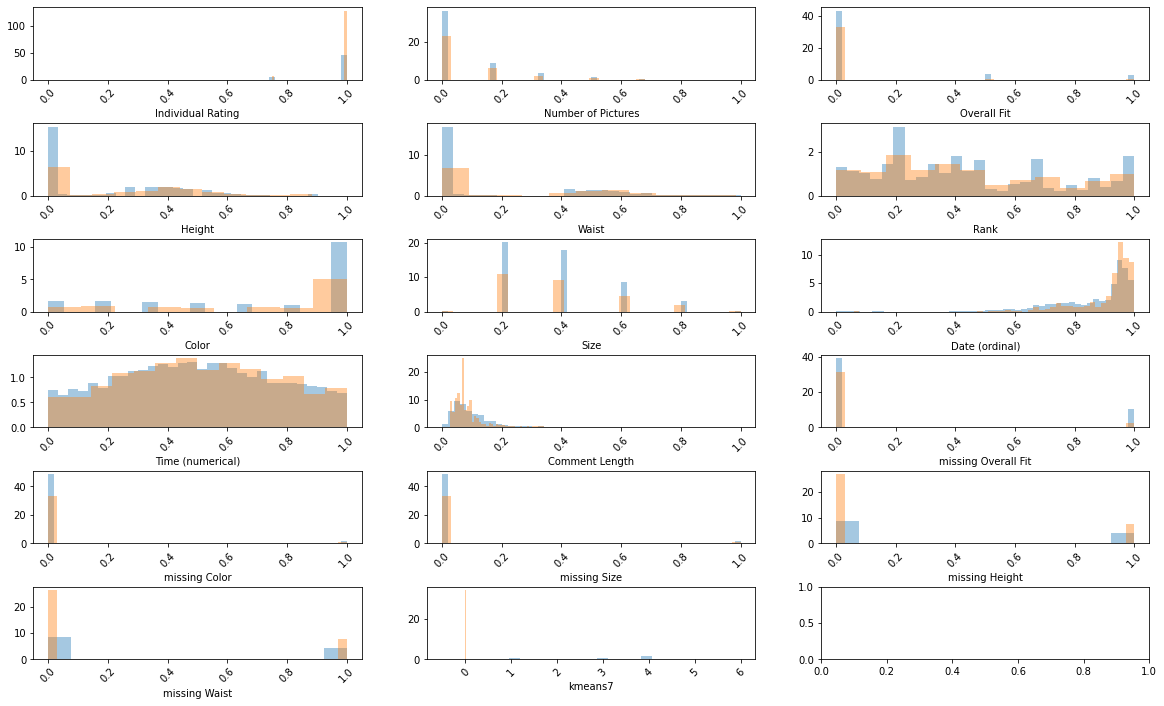

In [167]:
import seaborn as sns
fig, ax = plt.subplots(6,3,figsize=(20,12))
ax = ax.ravel()
count=0

kmeans_cluster = reviews_normalized[reviews_normalized['kmeans7'] == 0]

for col in reviews_normalized.columns:
    sns.distplot(a=reviews_normalized[col],ax=ax[count],kde=False,norm_hist=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    sns.distplot(a=kmeans_cluster[col],ax=ax[count],kde=False,norm_hist=True)
    count+=1

In [ ]:
fig, ax = plt.subplots(4,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    sns.distplot(a=X[num], ax=ax[count],kde=False)
    count+= 1
    sns.boxplot(x=num, data=X, ax=ax[count], palette='Blues')
    count+=1

In [151]:
reviews_normalized[reviews_normalized['kmeans7'] == 2].describe()

,Individual Rating,Number of Pictures,Overall Fit,Height,Waist,Rank,Color,Size,Date (ordinal),Time (numerical),Comment Length,missing Overall Fit,missing Color,missing Size,missing Height,missing Waist,kmeans7
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.0
mean,0.979701,0.044160,0.066239,0.152360,0.126100,0.416541,0.698718,0.381197,0.932847,0.416607,0.110824,0.042735,0.012821,0.012821,0.217949,0.217949,2.0
std,0.068431,0.122354,0.214529,0.226465,0.230916,0.303017,0.362518,0.179619,0.062212,0.200641,0.063717,0.202693,0.112741,0.112741,0.413737,0.413737,0.0
min,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.641685,0.020638,0.033067,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.161765,0.375000,0.200000,0.922319,0.251956,0.054732,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.348739,1.000000,0.400000,0.949672,0.378972,0.093501,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,1.000000,0.000000,0.000000,0.376812,0.029851,0.686975,1.000000,0.400000,0.969639,0.585617,0.149088,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,1.000000,0.833333,1.000000,0.884058,0.865672,1.000000,1.000000,0.800000,1.000000,0.982244,0.332953,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
